# Car Selling Price Perdciton 

## Libraries


In [2]:
#Frequently Used Machine Learning All Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge


## Read Data

In [3]:
#Read Text File convert into DataFrame
read_data=pd.read_csv("used_cars.csv")
df=pd.DataFrame(read_data)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## Data Preprocessing

In [4]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [6]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
df[df.duplicated()]
#No duplicate values

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [8]:
#Fuel Type with Mode
#Accident with Mode
#Clean_title with Mode
df["fuel_type"].fillna(df["fuel_type"].mode()[0], inplace=True)
df["accident"].fillna(df["accident"].mode()[0], inplace=True)
df["clean_title"].fillna(df["clean_title"].mode()[0], inplace=True)
df.isnull().sum()


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
#Conver String Prcie into Integer
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(int)  #type:ignore

#Convert String milage into integer
df['milage'] = df['milage'].replace('[^\d]', '', regex=True).astype(int) #type:ignore

In [10]:
#Check how many cars are accidented
df['accident'].value_counts()

None reported                             3023
At least 1 accident or damage reported     986
Name: accident, dtype: int64

In [11]:
#Check how many cars are accidented
print(f"Total Values : {df['clean_title'].value_counts()}")
#This Column contain only one value so drop it 
df.drop('clean_title', axis=1,inplace=True)

Total Values : Yes    4009
Name: clean_title, dtype: int64


In [12]:
#Check The fuel types we have in this dataset
df['fuel_type'].value_counts()

Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: fuel_type, dtype: int64

In [13]:
#Count how many types of Engine we have 
Engine=df['engine'].value_counts()
print(f"We have {Engine.count()} Differant Types Of engines")

We have 1146 Differant Types Of engines


In [14]:
#List of all INterior Colors At Cars
df['int_col'].value_counts()  
#156 Values

Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: int_col, Length: 156, dtype: int64

In [15]:
#List of all Exterior colors at Car
df['ext_col'].value_counts()   
#319 Values

Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: ext_col, Length: 319, dtype: int64

In [16]:
#List of all transmission held at cars
df['transmission'].value_counts()   
#62 Values

A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
                                                 ... 
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: transmission, Length: 62, dtype: int64

## Data Visuization

Text(0.5, 1.0, 'All Brands Of Car`s')

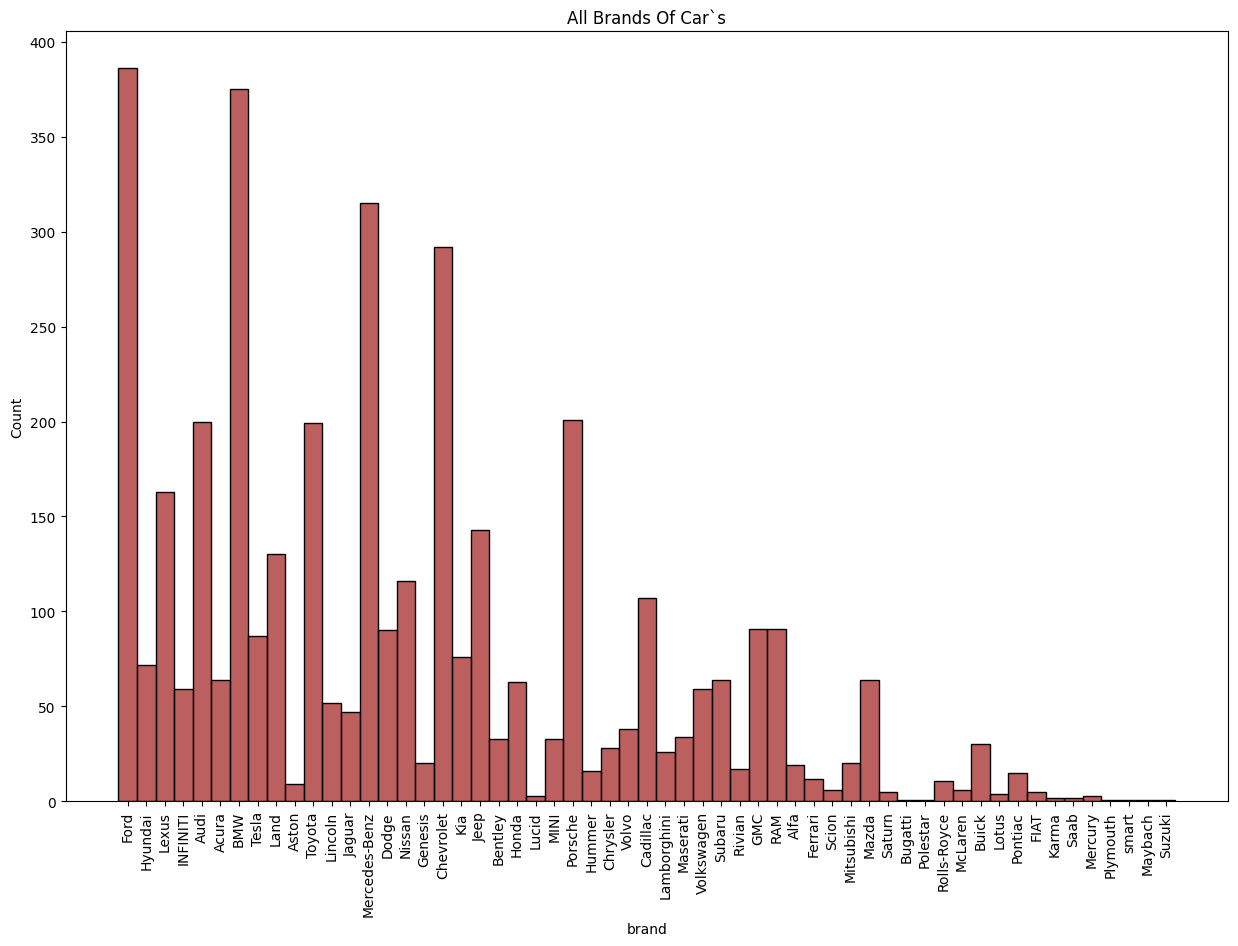

In [17]:
plt.figure(figsize=(15, 10))
sns.histplot(df['brand'],color="brown")
plt.xticks(rotation=90)
plt.title('All Brands Of Car`s')

Text(0.5, 1.0, 'All MOdels Year`s List')

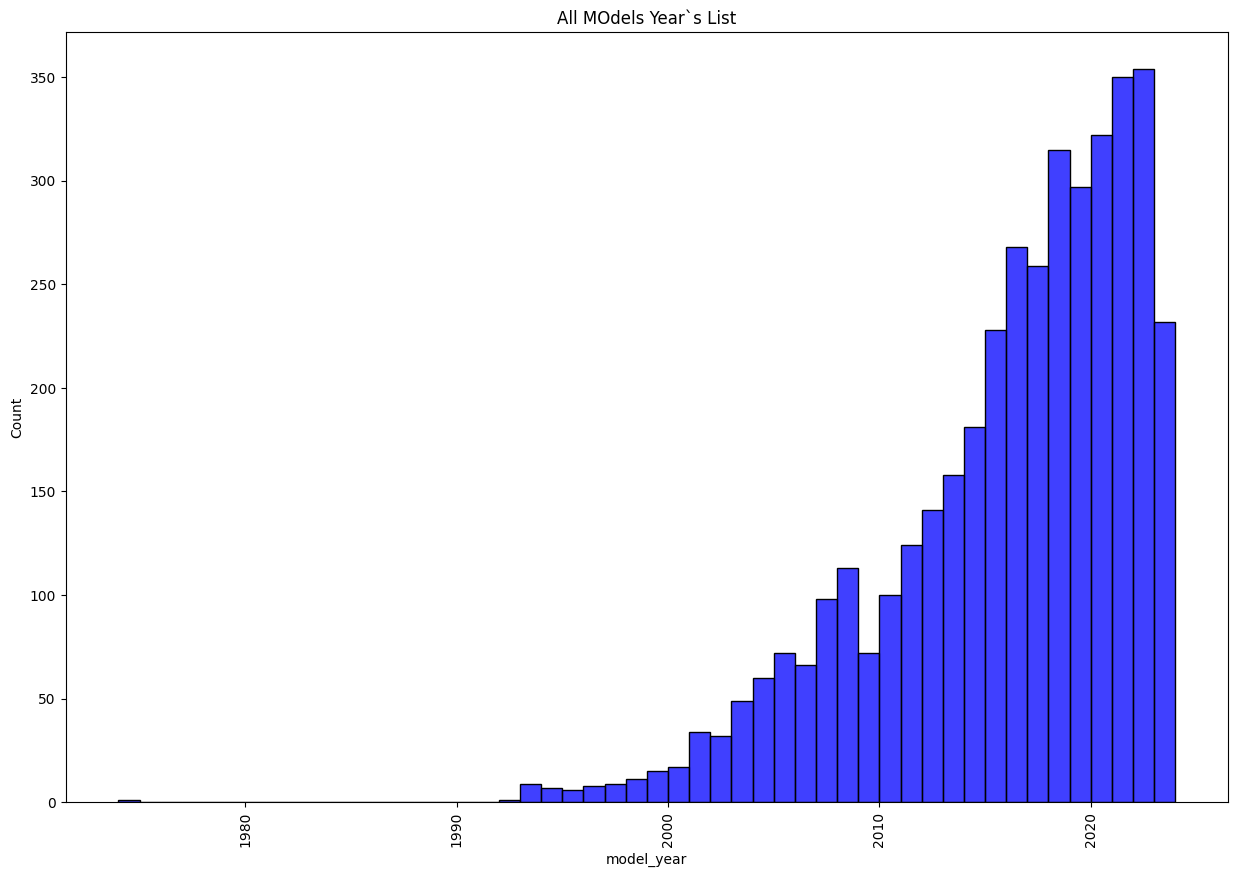

In [18]:
plt.figure(figsize=(15, 10))
sns.histplot(df['model_year'],color="Blue")
plt.xticks(rotation=90)
plt.title('All MOdels Year`s List')

Text(0.5, 1.0, 'All MOdels Fuel Type`s List')

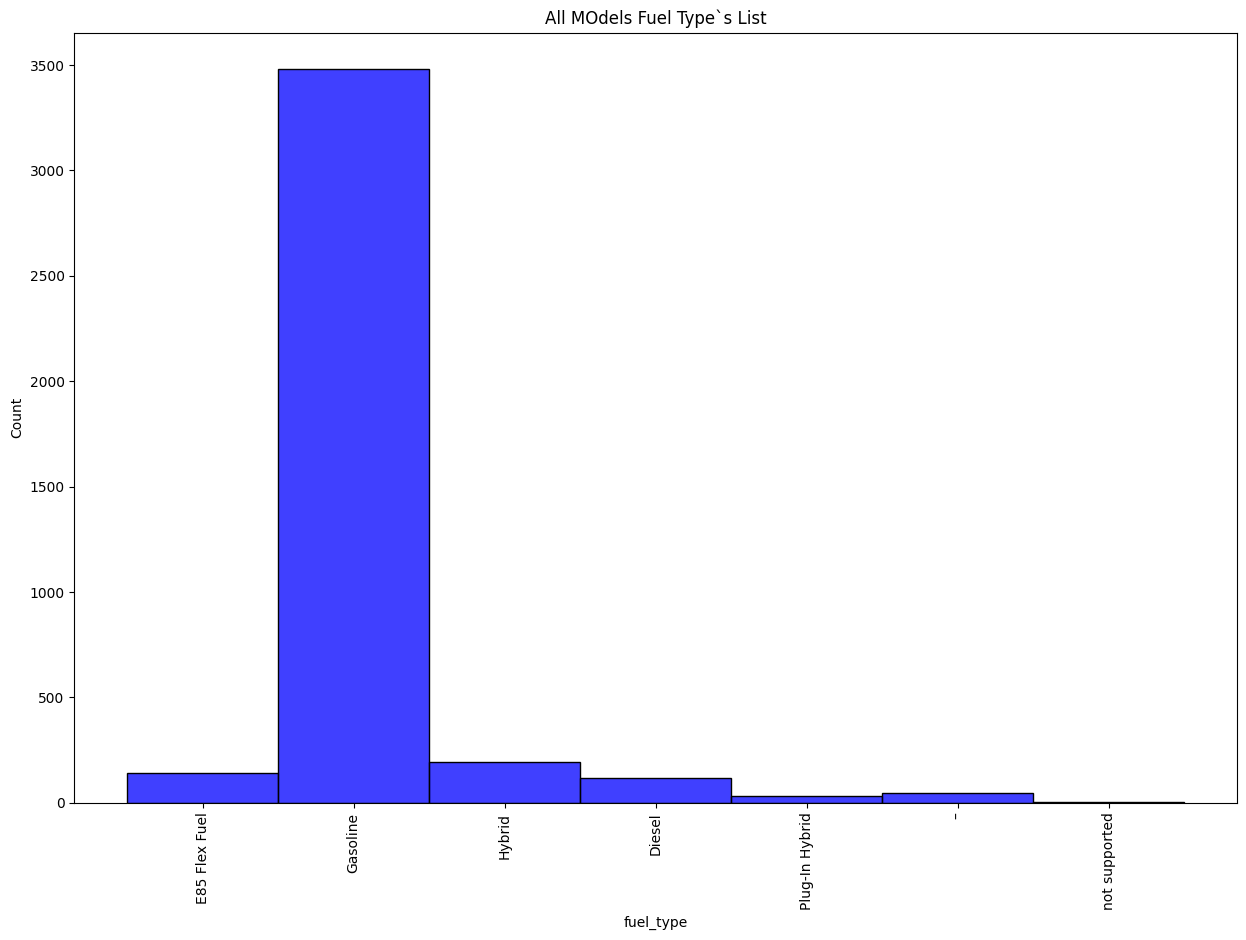

In [19]:

plt.figure(figsize=(15, 10))
sns.histplot(df['fuel_type'],color="Blue")
plt.xticks(rotation=90)
plt.title('All MOdels Fuel Type`s List')

Text(0.5, 1.0, 'All MOdels Transmission List')

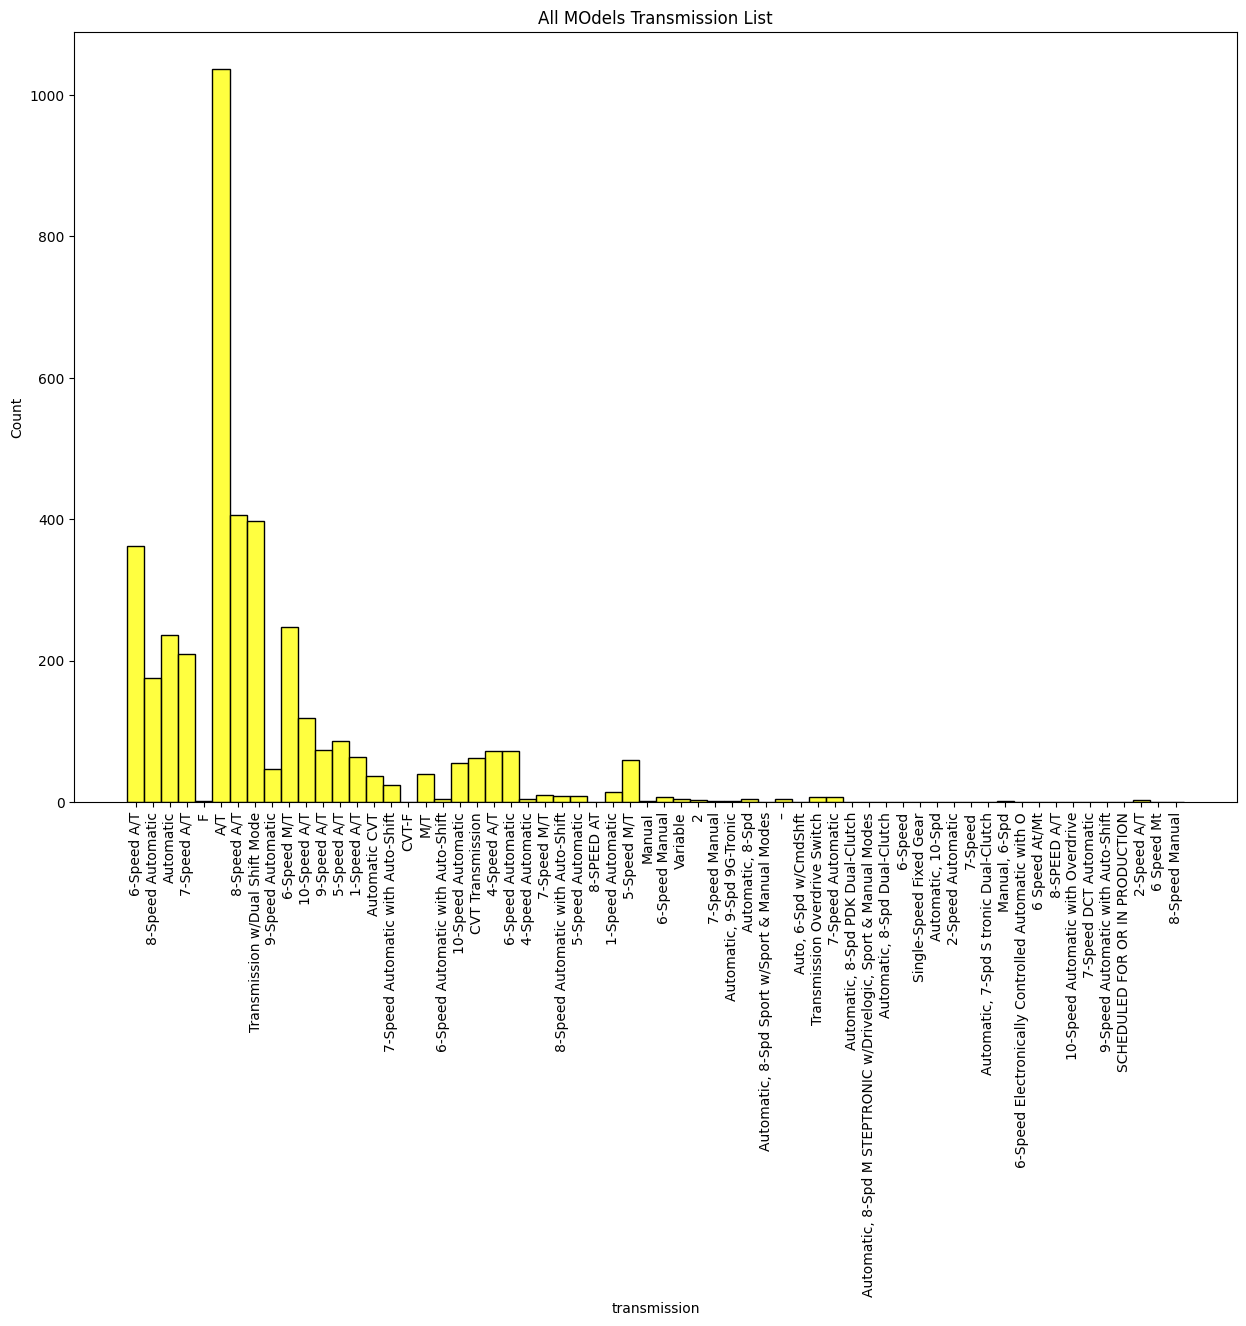

In [20]:
plt.figure(figsize=(15, 10))
sns.histplot(df['transmission'],color="yellow")
plt.xticks(rotation=90)
plt.title('All MOdels Transmission List')

Text(0.5, 1.0, 'All MOdels Accident List')

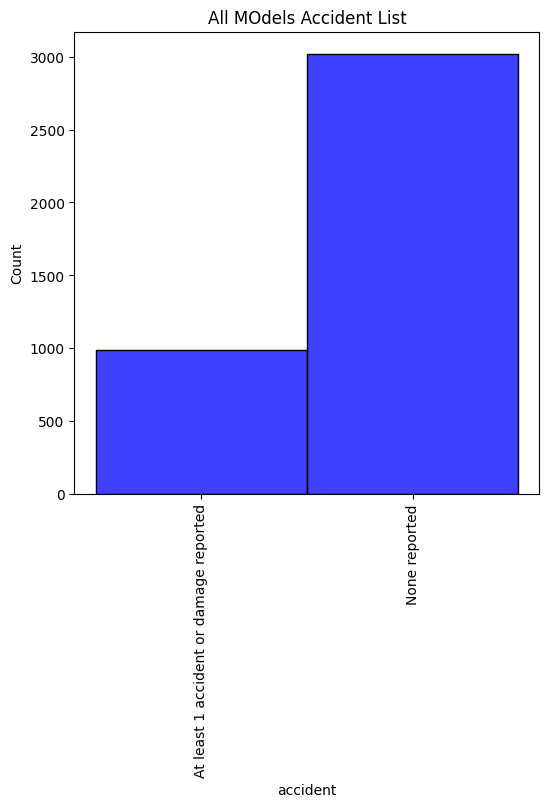

In [21]:
plt.figure(figsize=(6, 6))
sns.histplot(df['accident'],color="Blue")
plt.xticks(rotation=90)
plt.title('All MOdels Accident List')

## Feature Selection

In [22]:
#Encoding Catagorical Columns into NUmerical Foam
label_encoder = LabelEncoder()
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df["accident"]=label_encoder.fit_transform(df["accident"])
df["brand"]=label_encoder.fit_transform(df["brand"])
df["model"]=label_encoder.fit_transform(df["model"])
df["engine"]=label_encoder.fit_transform(df["engine"])
df["ext_col"]=label_encoder.fit_transform(df["ext_col"])
df["fuel_type"]=label_encoder.fit_transform(df["fuel_type"])
df["int_col"]=label_encoder.fit_transform(df["int_col"])
df["accident"]=label_encoder.fit_transform(df["accident"])


In [23]:
#Numerical Colum Scalling 
numerical_features = ["price","model_year","milage","transmission","accident","brand","model","engine","ext_col","fuel_type","int_col","accident"]
scaler_minmax = MinMaxScaler()
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [24]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,0.250000,0.918819,0.78,0.125710,0.166667,0.507424,0.262295,0.091195,0.090323,0.0,0.002812
1,0.339286,0.623089,0.94,0.085557,0.333333,0.494323,0.524590,0.581761,0.458065,0.0,0.012196
2,0.482143,0.698471,0.96,0.055006,0.333333,0.472489,0.655738,0.119497,0.090323,1.0,0.017817
3,0.357143,0.654718,0.82,0.219313,0.500000,0.632314,0.377049,0.091195,0.090323,1.0,0.004573
4,0.053571,0.645756,0.94,0.024043,0.333333,0.174672,0.524590,0.377358,0.090323,1.0,0.011178
...,...,...,...,...,...,...,...,...,...,...,...
4004,0.089286,0.255140,0.98,0.001516,0.333333,0.925764,0.540984,0.157233,0.483871,1.0,0.117866
4005,0.053571,0.771745,0.96,0.026673,0.333333,0.623581,0.967213,0.091195,0.090323,1.0,0.017581
4006,0.767857,0.884027,0.96,0.004979,0.333333,0.989520,0.655738,0.091195,0.090323,1.0,0.030148
4007,0.250000,0.351081,0.92,0.081255,0.333333,0.800873,0.622951,0.119497,0.090323,1.0,0.020663


## Split Data

In [25]:
x = df.drop(['price'], axis=1)
y=  df["price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [26]:
Linear = LinearRegression()

Linear.fit(X_train, y_train)

y_pred =Linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_linear}")

print(f"R-squared (R²): {r2}")

n_features = Linear.coef_.shape[0]
print("Number of features:", n_features,"\n\n")


coefficients = Linear.coef_
feature_names = X_train.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Mean Squared Error: 0.002212627863459811
R-squared (R²): 0.056604658177108025
Number of features: 10 


Feature: brand, Coefficient: 0.003952940743314065
Feature: model, Coefficient: -0.003370860036527901
Feature: model_year, Coefficient: 0.017367053456488483
Feature: milage, Coefficient: -0.036559161426613175
Feature: fuel_type, Coefficient: -0.005423273649598196
Feature: engine, Coefficient: 0.020379094735075258
Feature: transmission, Coefficient: 0.001837219331861662
Feature: ext_col, Coefficient: 0.0005200902075008921
Feature: int_col, Coefficient: 0.003522668160723903
Feature: accident, Coefficient: 0.002061231693387369


## Decision Tree Regression Model

In [27]:
DecisionTree = DecisionTreeRegressor()

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)


mse_decision = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_decision}")

print(f"R-squared (R²): {r2}")


number_of_features = len(DecisionTree.feature_importances_)
print("Number of features used in the DecisionTreeRegressor model:", number_of_features,"\n\n")


feature_importance = DecisionTree.feature_importances_
feature_names = list(X_train.columns)  
feature_importance_sequence = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_sequence:
    print(f"Feature: {feature}, Importance: {importance}")


#Milage Engine and Model is high Feature Imortance 

Mean Squared Error: 0.002396082812794075
R-squared (R²): -0.02161479638841235
Number of features used in the DecisionTreeRegressor model: 10 


Feature: milage, Importance: 0.3870218522504448
Feature: engine, Importance: 0.2300684467142043
Feature: model, Importance: 0.12732717377315003
Feature: ext_col, Importance: 0.08898940976836978
Feature: brand, Importance: 0.08139140174694587
Feature: transmission, Importance: 0.0331956219817917
Feature: int_col, Importance: 0.027087876575452564
Feature: model_year, Importance: 0.021840887894012728
Feature: fuel_type, Importance: 0.002674517202001819
Feature: accident, Importance: 0.00040281209362643175


## Random forest Classifier Regression Model

In [28]:
RandomForest = RandomForestRegressor()

RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_random}")

print(f"R-squared (R²): {r2}")

number_of_features = len(RandomForest.feature_importances_)
print("Number of features used in the RandomForestRegressor model:", number_of_features,"\n\n")




feature_importance = RandomForest.feature_importances_
feature_names = list(X_train.columns)  
feature_importance_sequence = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_sequence:
    print(f"Feature: {feature}, Importance: {importance}")

#Milage Engine and Model is high Feature Imortance 


Mean Squared Error: 0.002036907742285328
R-squared (R²): 0.13152622384940638
Number of features used in the RandomForestRegressor model: 10 


Feature: milage, Importance: 0.3550100999188124
Feature: engine, Importance: 0.2452801612794694
Feature: model, Importance: 0.09910095289959052
Feature: ext_col, Importance: 0.09593333259430253
Feature: brand, Importance: 0.0710824891104894
Feature: model_year, Importance: 0.052350554461024004
Feature: transmission, Importance: 0.04646135866961596
Feature: int_col, Importance: 0.027311648506819428
Feature: fuel_type, Importance: 0.006265968723043112
Feature: accident, Importance: 0.0012034338368332549


## Support Vector Regression (SVR)

In [29]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

svr_predictions = svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse_svr = mean_squared_error(y_test, svr_predictions)


print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared (R²): {r2}")


Mean Squared Error: 0.007219844605134514
R-squared (R²): 0.13152622384940638


## Ridge Regression (L2 Regularization) Model

In [30]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, ridge_predictions)
r2 = r2_score(y_test, y_pred)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"R-squared (R²): {r2}")


Ridge Regression Mean Squared Error: 0.0022134947304443715
R-squared (R²): 0.13152622384940638


## Conclusion

In [31]:
dictionary={
             "LinearRegression MOdel":mse_linear,
            "DecisionTreeRegressor MOdel":mse_decision,
            "RandomForestRegressor Model":mse_random,
            "SVR Model :":mse_svr,
            "Ridge Regression MOdel :":mse_ridge
            }
dictionary = pd.DataFrame(list(dictionary.items()), columns=['Model', 'Mean Squared Error'])
dictionary

,Model,Mean Squared Error
0,LinearRegression MOdel,0.002213
1,DecisionTreeRegressor MOdel,0.002396
2,RandomForestRegressor Model,0.002037
3,SVR Model :,0.007220
4,Ridge Regression MOdel :,0.002213
